# LINEAR REGRESSION

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get the training data

In [21]:
dfx=pd.read_csv('linearX.csv')
dfy=pd.read_csv('linearY.csv')

x=dfx.values
y=dfy.values
print(x.shape)
print(y.shape)


(99, 1)
(99, 1)


## Visualise and Preprocess

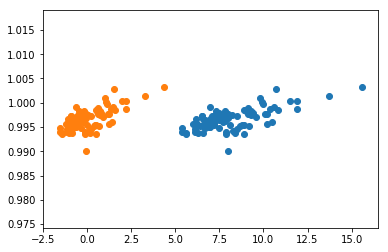

In [22]:
plt.scatter(x,y)
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)
plt.show()

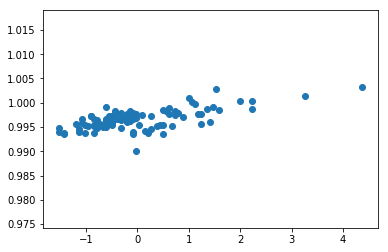

In [23]:
plt.scatter(X,Y)
plt.show()

## ALGORITHM

### Gradient Algo.
- Start with a random theta
- Repeat until converge
    - Update theta according to the rule

In [24]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

def error(X,Y,theta):
    m=X.shape[0]
    error=0
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad=np.zeros((2,))
    m=X.shape[0]
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
    
    return grad

#Algorithm
def gradientDescent(X,Y,learning_rate=.001):
    theta = np.array([-2.0,0.0])
    itr=0
    max_itr=100
    error_list=[]
    theta_list=[]
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        itr+=1
    return theta,error_list,theta_list
    
    
    
    
    

In [25]:
final_theta,error_list,theta_list=gradientDescent(X,Y)

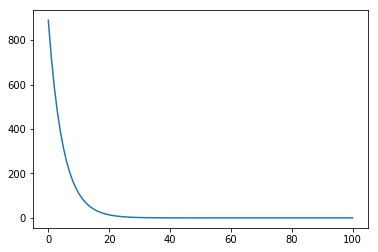

In [26]:
plt.plot(error_list)
plt.show()

In [27]:
print(final_theta)

[0.996554  0.0013579]


In [28]:
### Plot the line for testing data

xtest=np.linspace(-2,6,14)
print(xtest)

[-2.         -1.38461538 -0.76923077 -0.15384615  0.46153846  1.07692308
  1.69230769  2.30769231  2.92307692  3.53846154  4.15384615  4.76923077
  5.38461538  6.        ]


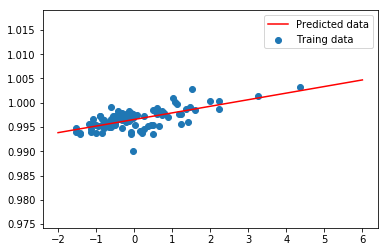

In [29]:
plt.scatter(X,Y,label='Traing data')
plt.plot(xtest,hypothesis(xtest,final_theta),color="red",label='Predicted data')
plt.legend()
plt.show()



## Visualising Gradient Descent
-Plotting Error Surface and Contours

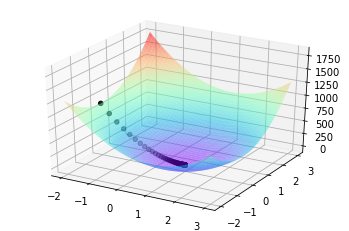

In [30]:
# 3D Loss Plot
from mpl_toolkits.mplot3d import Axes3D
#ax = fig.add_subplot(111,project='3d')
T0 = np.arange(-2,3,0.01)
T1 = np.arange(-2,3,0.01)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
m = T0.shape[0]
n = T0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y - T1[i,j]*X - T0[i,j])**2)
        
fig = plt.figure()
axes = fig.gca(projection='3d')

theta_list = np.array(theta_list)
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k')

axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=.5)
plt.show()

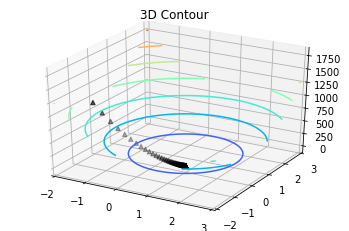

In [32]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.set_xlim([-2,3])
axes.set_ylim([-2,3])
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k',marker='^')
plt.title("3D Contour")
plt.show()

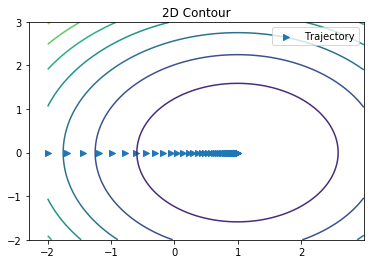

In [33]:
plt.contour(T0,T1,J)
plt.title("2D Contour")
th = np.array(theta_list)
plt.scatter(th[:,0],th[:,1],marker='>',label='Trajectory')
plt.legend()
plt.show()